In [1]:
!pip install roboflow supervision opencv-python

^C


loading Roboflow workspace...
loading Roboflow project...


SupervisionWarnings: from_roboflow is deprecated: `Detections.from_roboflow` is deprecated and will be removed in `supervision-0.22.0`. Use `Detections.from_inference` instead.


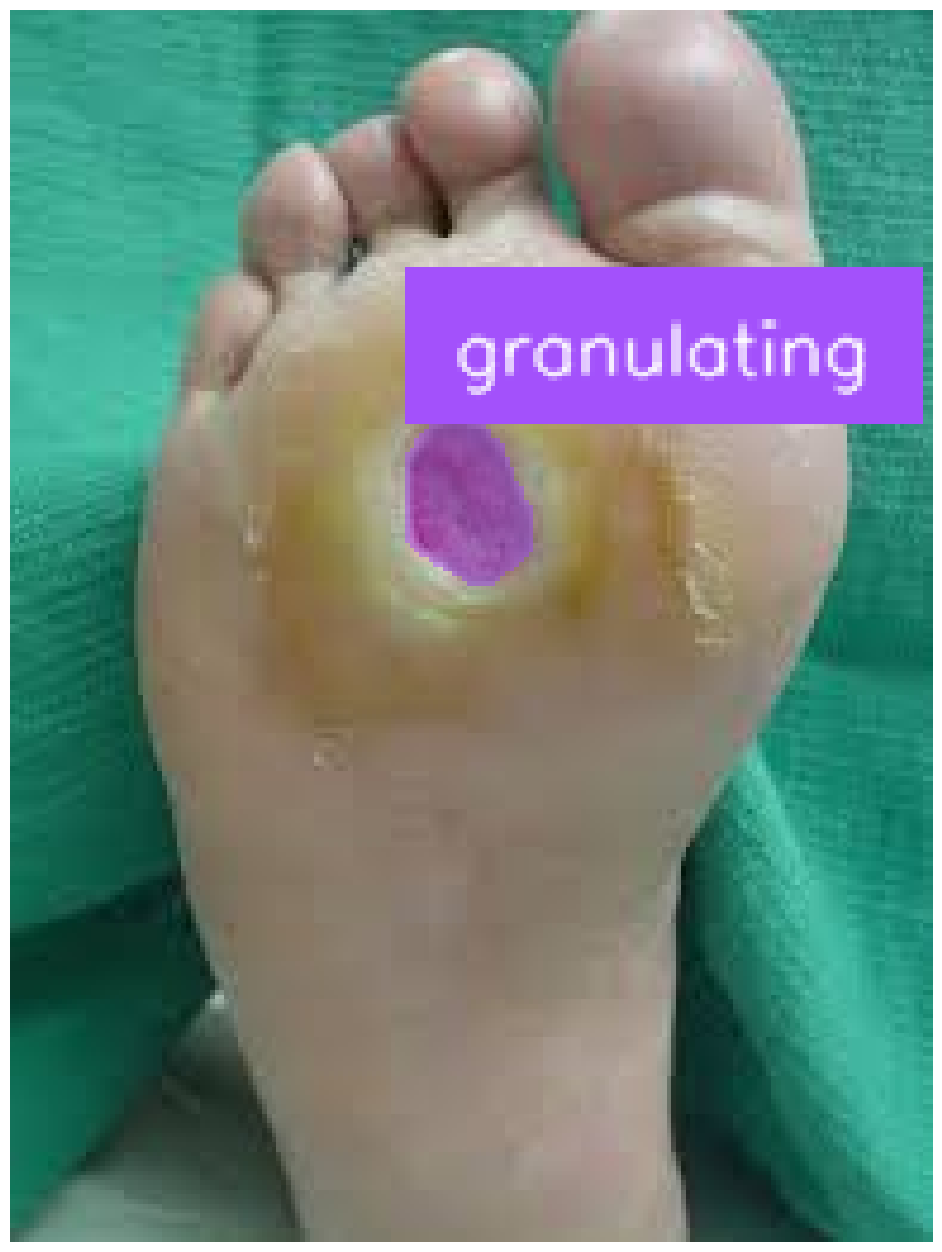

True

In [2]:
from roboflow import Roboflow
import supervision as sv
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = "leg1.jpg"



rf = Roboflow(api_key="oGGjBy2IYnpw8cLjc6ba")
project = rf.workspace().project("tissues-v3b6t")
model = project.version(1).model
result = model.predict(image_path, confidence=40).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_roboflow(result)

label_annotator = sv.LabelAnnotator()
mask_annotator = sv.MaskAnnotator()

image = cv2.imread("leg1.jpg")

annotated_image = mask_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))
cv2.imwrite("annotated_image.png", annotated_image)

In [15]:
result


{'predictions': [{'x': 96.5,
   'y': 103.0,
   'width': 27.0,
   'height': 34.0,
   'confidence': 0.8365097045898438,
   'class': 'granulating',
   'points': [{'x': 88.51249999999999, 'y': 86.1984375},
    {'x': 88.209375, 'y': 86.60312499999999},
    {'x': 88.209375, 'y': 87.0078125},
    {'x': 83.6625, 'y': 93.078125},
    {'x': 83.6625, 'y': 111.2890625},
    {'x': 84.57187499999999, 'y': 112.503125},
    {'x': 84.875, 'y': 112.503125},
    {'x': 85.48124999999999, 'y': 113.3125},
    {'x': 85.784375, 'y': 113.3125},
    {'x': 86.390625, 'y': 114.12187499999999},
    {'x': 86.69375, 'y': 114.12187499999999},
    {'x': 86.99687499999999, 'y': 114.5265625},
    {'x': 87.60312499999999, 'y': 114.5265625},
    {'x': 87.90625, 'y': 114.93124999999999},
    {'x': 88.209375, 'y': 114.93124999999999},
    {'x': 88.51249999999999, 'y': 115.3359375},
    {'x': 88.815625, 'y': 115.3359375},
    {'x': 89.11874999999999, 'y': 115.740625},
    {'x': 89.421875, 'y': 115.740625},
    {'x': 89.725, 

In [4]:
labels[0]

'granulating'